In [9]:
import os
import sys

module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import torch
from dacite import from_dict

from in_depth.buffer import ReplayBuffer
from in_depth.hiv_patient import HIVPatient
from in_depth.q_agent import Agent
from in_depth.q_learning import Qlearner, QLearningCongfig

plt.style.use("ggplot")

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [44]:
conf_dict = {
    "gamma": 0.99,
    "batch_size": 256,
    "epsilon": {"start": 0.95, "end": 0, "decay": 200},
    "learning_rate": 0.001,
    "num_episodes": 25,
    "steps_per_episode": 80,
    "warm_start": {"episodes": 10, "steps_per_episode": 100},
    "target_update_rate": 1000,
}

patient = HIVPatient()
conf = from_dict(data_class=QLearningCongfig, data=conf_dict)
memory = ReplayBuffer(6000)
agent = Agent(patient=patient, replay_buffer=memory)
q_learner = Qlearner(
    memory=memory,
    conf=conf,
    patient=patient,
    agent=agent,
    device=DEVICE,
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.71s/it]


In [45]:
rewards, losses = q_learner.train()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 20.79batch/s]
2022-03-21 11:36:48.831 | INFO     | in_depth.q_learning:train:162 - episode = 0,  reward = 1465949.1703843402
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 22.22batch/s]
2022-03-21 11:36:52.436 | INFO     | in_depth.q_learning:train:162 - episode = 1,  reward = 2782150.979647348
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:03<00:00, 21.32batch/s]
2022-03-21 11:36:56.192 | INFO     | in_depth.q_learning:train:162 - episode = 2,  reward = 5252937.662365786
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████

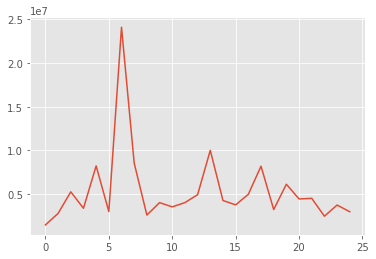

In [46]:
plt.plot(rewards)

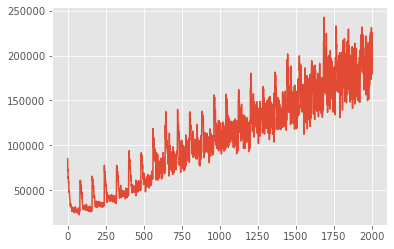

In [47]:
plt.plot(losses)